# OLAP (OnLine Analytical Process)

## O que é ?

* O termo OLAP foi criado em 1993 por E.F.Codd;

* São ferramentas utilizadas para apoiar os gestores, visando obter novos insights para auxiliá-los no processo de tomada de decisão;

* Permitia acesso rápido ao dados, permitindo uma análise dinâmica e multidimensional;

* Ferramentas trazem uma grande capacidade de efetuar cálculos complexos, como: previsões, percentuais de crescimento, médias diversas, etc..;

* Conceito chave: Multi-dimensionalidade; Dados modelados em uma estrutura de cubo, onde nos permite observar várias **dimensões**;

* As dimensões do cubo representam os componentes dos negócios da empresa, como: cliente, produto, fornecedor e tempo;

* A interseção das dimensões do cubo é chamada de **medida**, que podem ser representados por: venda, lucro, quantidade de unidade vendida, etc;

* Consolidação dos dados: São respondidas com base em perguntas, como: "Qual o total de vendas (média) de determinado produto (dimensão) foi verificada em determinada região (dimensão) no ultimo semestre (dimensão) ?". As respostas podem ser encontradas com base em uma análise multidimensional.
    
    * Os valores de média estarão na tabela **fato** e os assuntos que deseja consultar estarão nas tabelas **dimensões**.


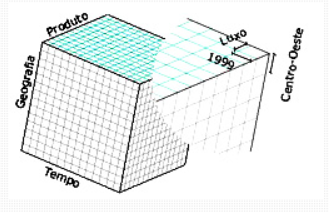

In [3]:
from IPython.display import Image
Image('cubo.png')

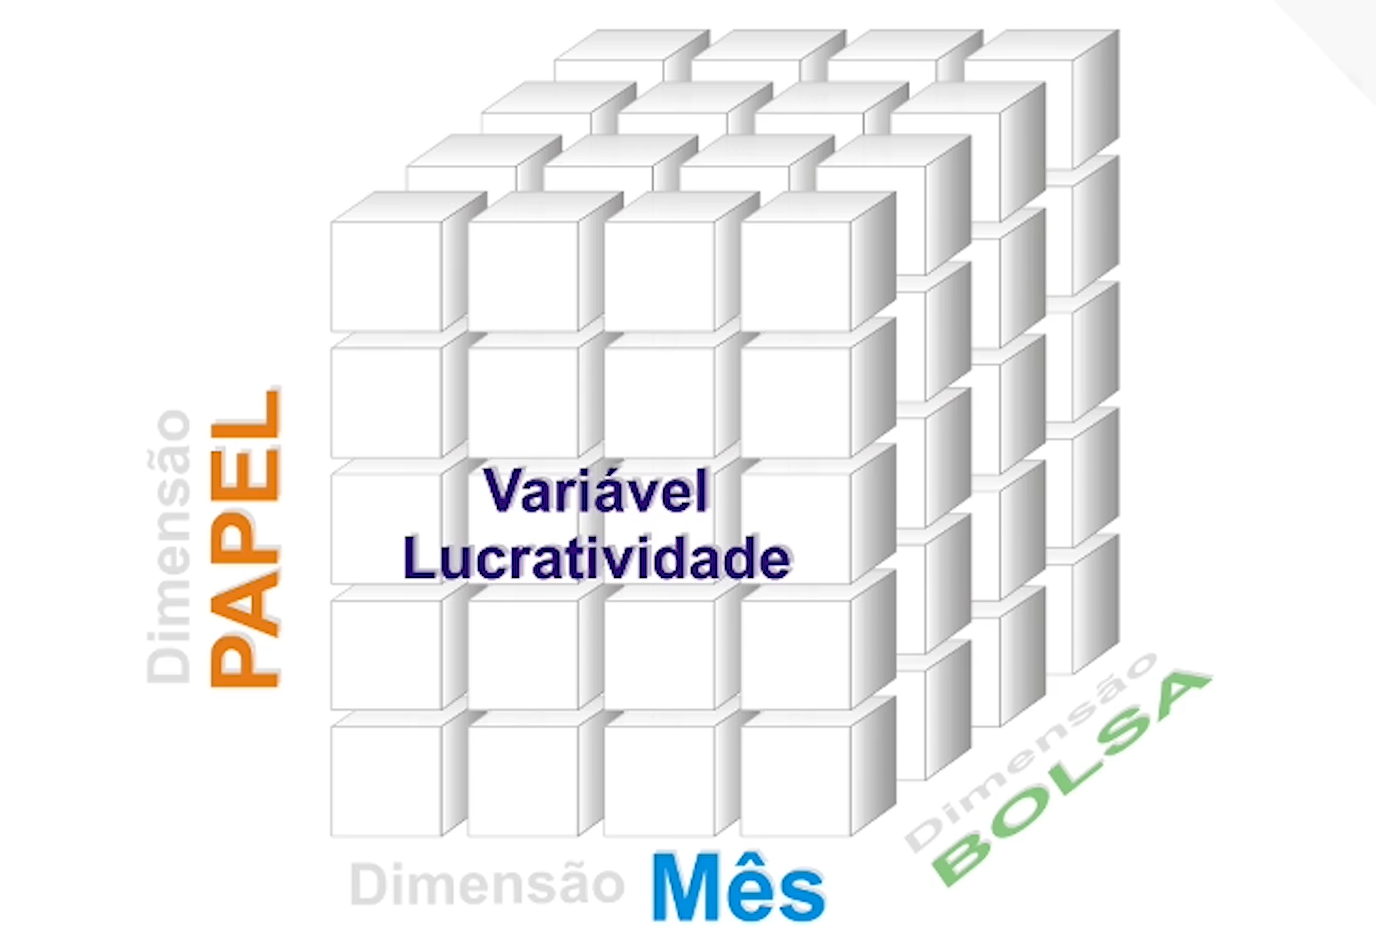

In [7]:
Image("Cubo2.png")

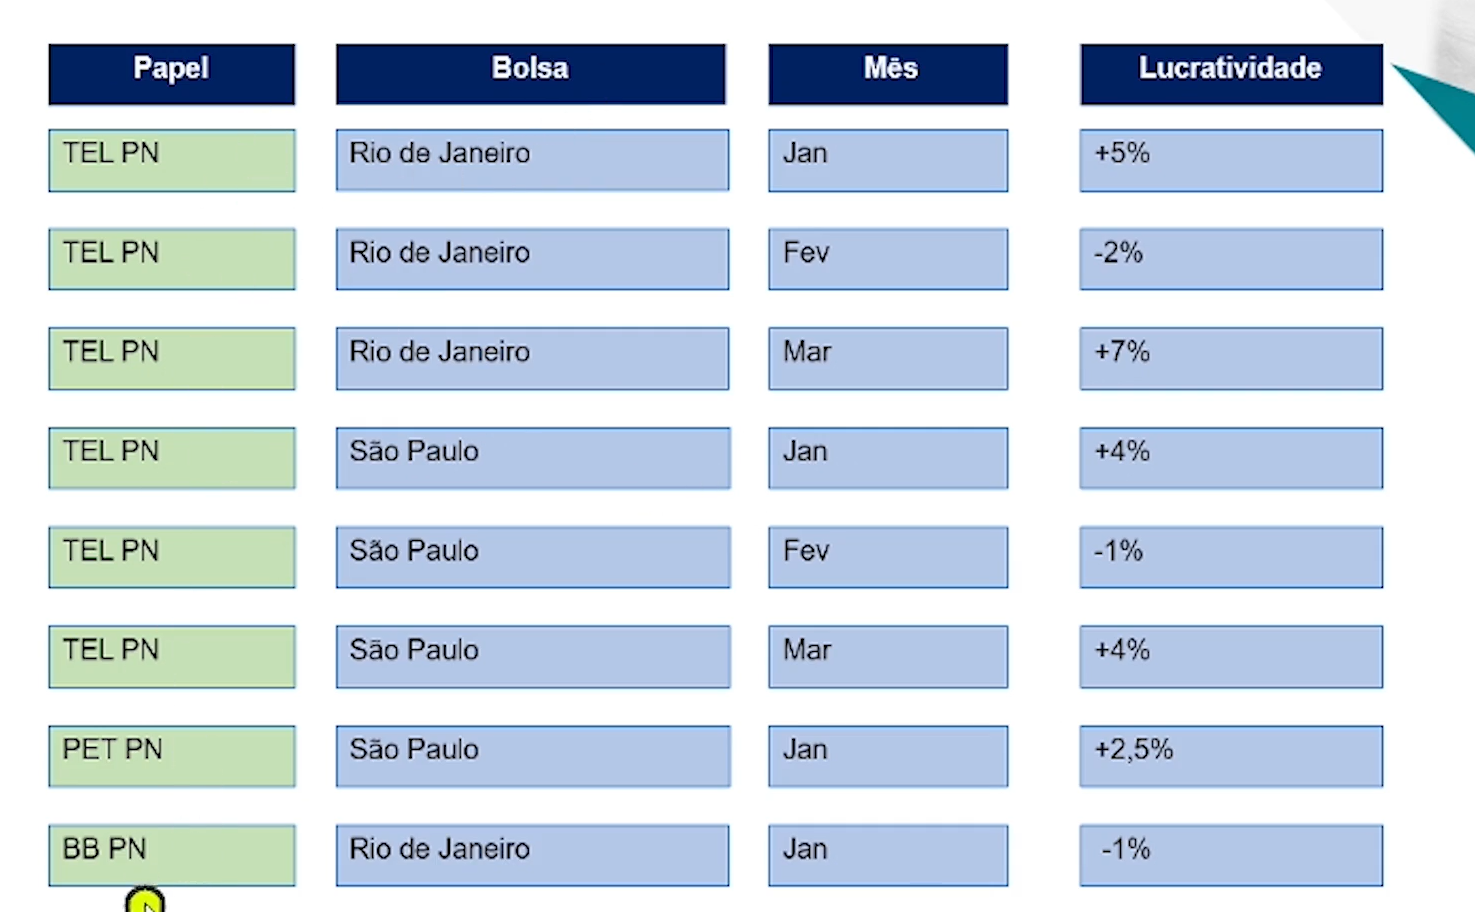

In [8]:
Image("TabelaCubo.png")

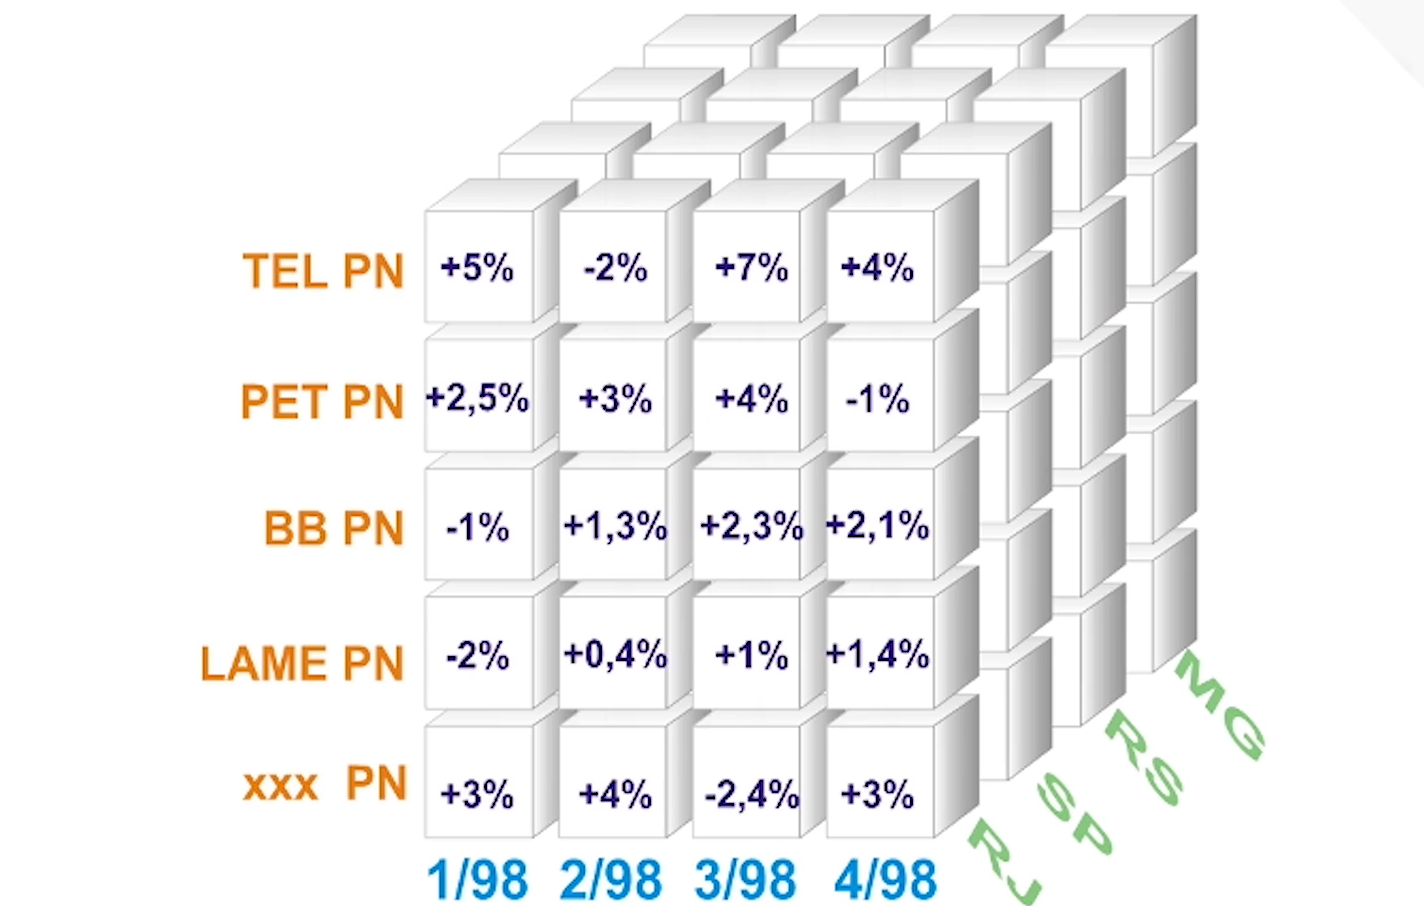

In [9]:
Image("CuboXTabela.png")

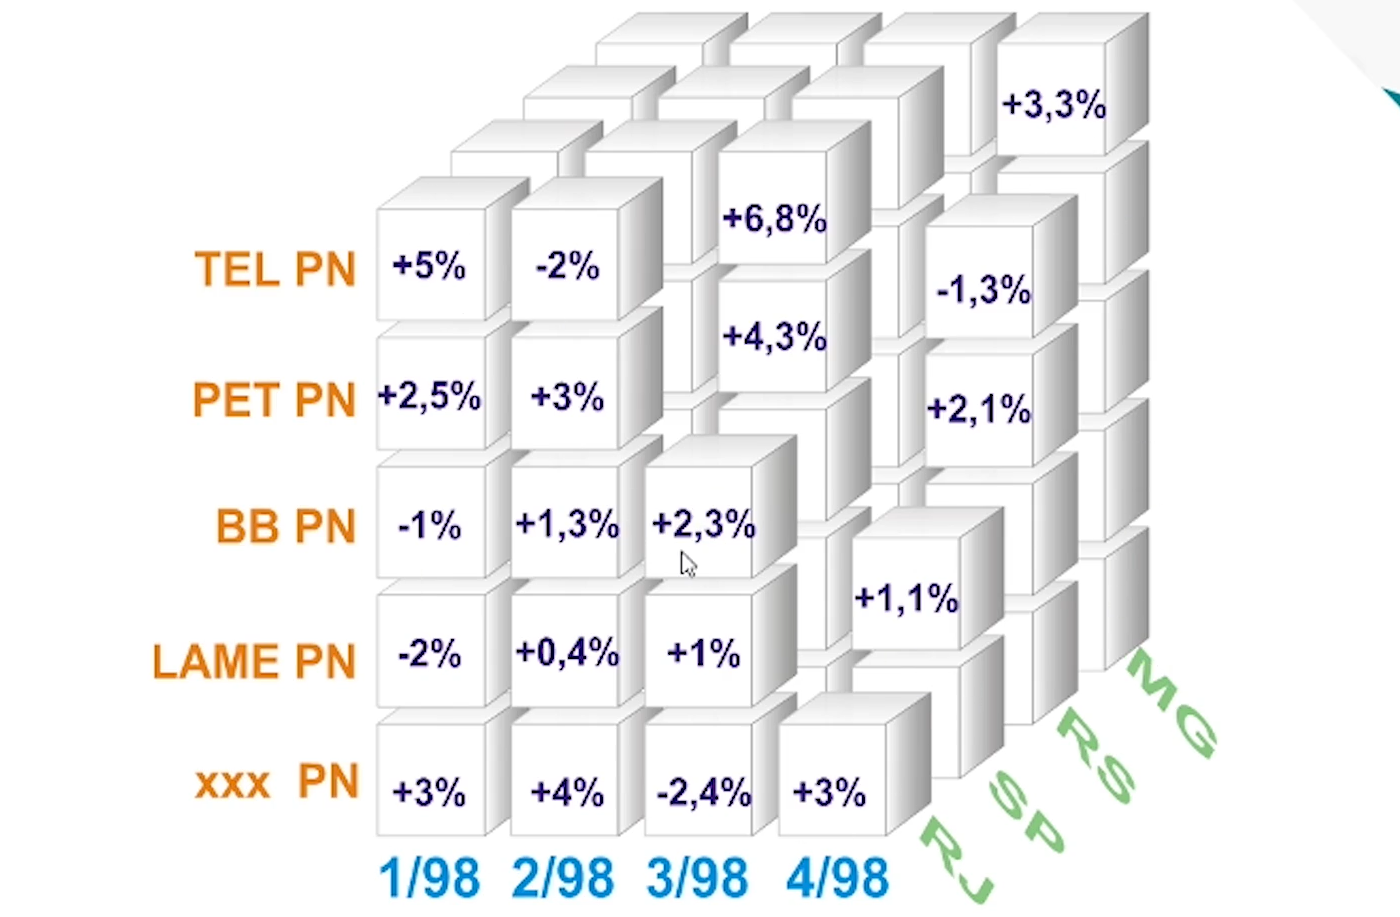

In [10]:
Image("CuboXTabela2.png")

* **Hierarquização**: Resolver os diferentes níveis de consolidação que se pode ter ao longo de uma dimensão;

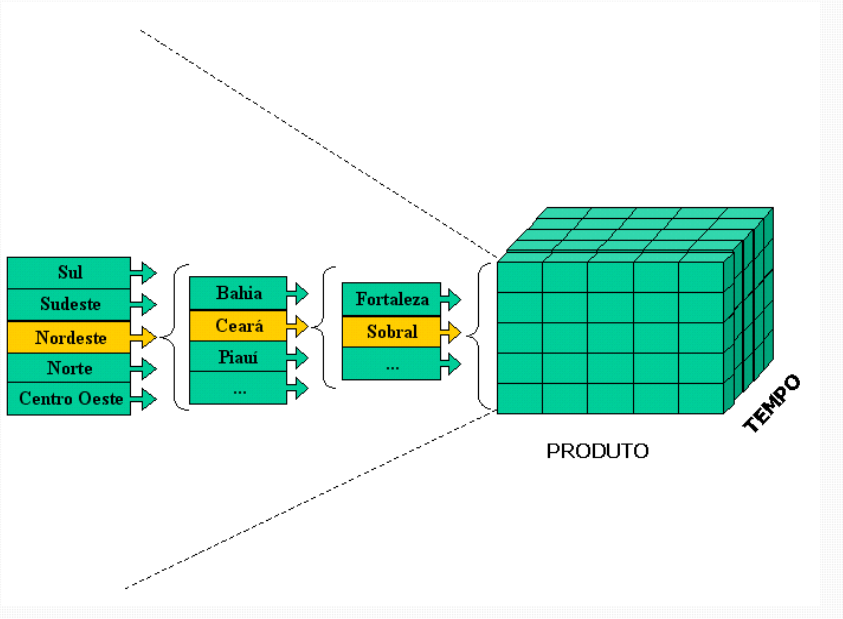

In [2]:
Image("hierarquizacao.png")

* **Pivoteamento**: Como em uma tabela dinâmica no Excel, podemos ver os dados hora por linha e depois mover (pivotar) para colunas e vice-versa.

* **Slice**: diz respeito ao fatiamento do cubo, ex: "Apenas as vendas de uma região são analisadas;

* **Dice**: capacidade de rotacionar o cubo, ex: "Passar da analise do tipo 'Quantidade de vendas de determinada regisõ geográfica discriminada por mês de um período' para 'Quantidade de vendas determinada mês, discriminada por região por regiões geográficas";

* **Drill Up/Down**: Capacidade de, a partir de uma nível de consolidação, obter-se resultados em níveis acima (up) ou abaixo (down) dentro da hierarquia de dimensões, ex: "A partir de 'Vendas por semestre', obter-se 'Venda anuais' (up) ou 'Vendas mensais' (down).

* **Drill Across**: Pular de uma dimensão para outra dimensão. É necessário a utilização de duas tabelas fatos e essas tabelas tem que compartilhar a mesma dimensão intermediária. Segundo Kimball (2002), "trata-se de uma operação sobre dois cubos. Os dados nos dois cubos são combinados nas dimensões comuns aos mesmos". Barbieri (2001), completa dizendo que "[...] embora correlacionadas, estão em estruturas separaas, porém unidas por algumas dimensões coerentes".

* **Drill Througth**: Possui o funcionamento parecido com o Drill Down, porém, tem como característica a posssibilidade de buscar os dados, ou informações, fora da estrutura principal. Por exemplo, após alcançar o nível máximo de detalhe em uma tabela fato, tem necessidade de se obter mais detalhes sobre determinada célula, como a nota fiscal, por exemplo, é possível acessar o arquivo de origem dessa informação, diminuindo a granularidade, aumentando o nível de detalhe e saindo da estrutura do DW ou de um Data Mart.

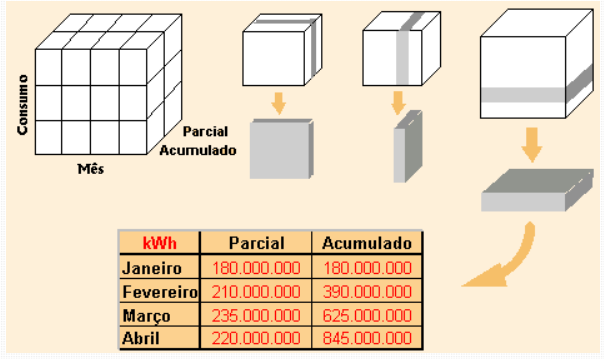

In [5]:
Image('SliceDice.png')

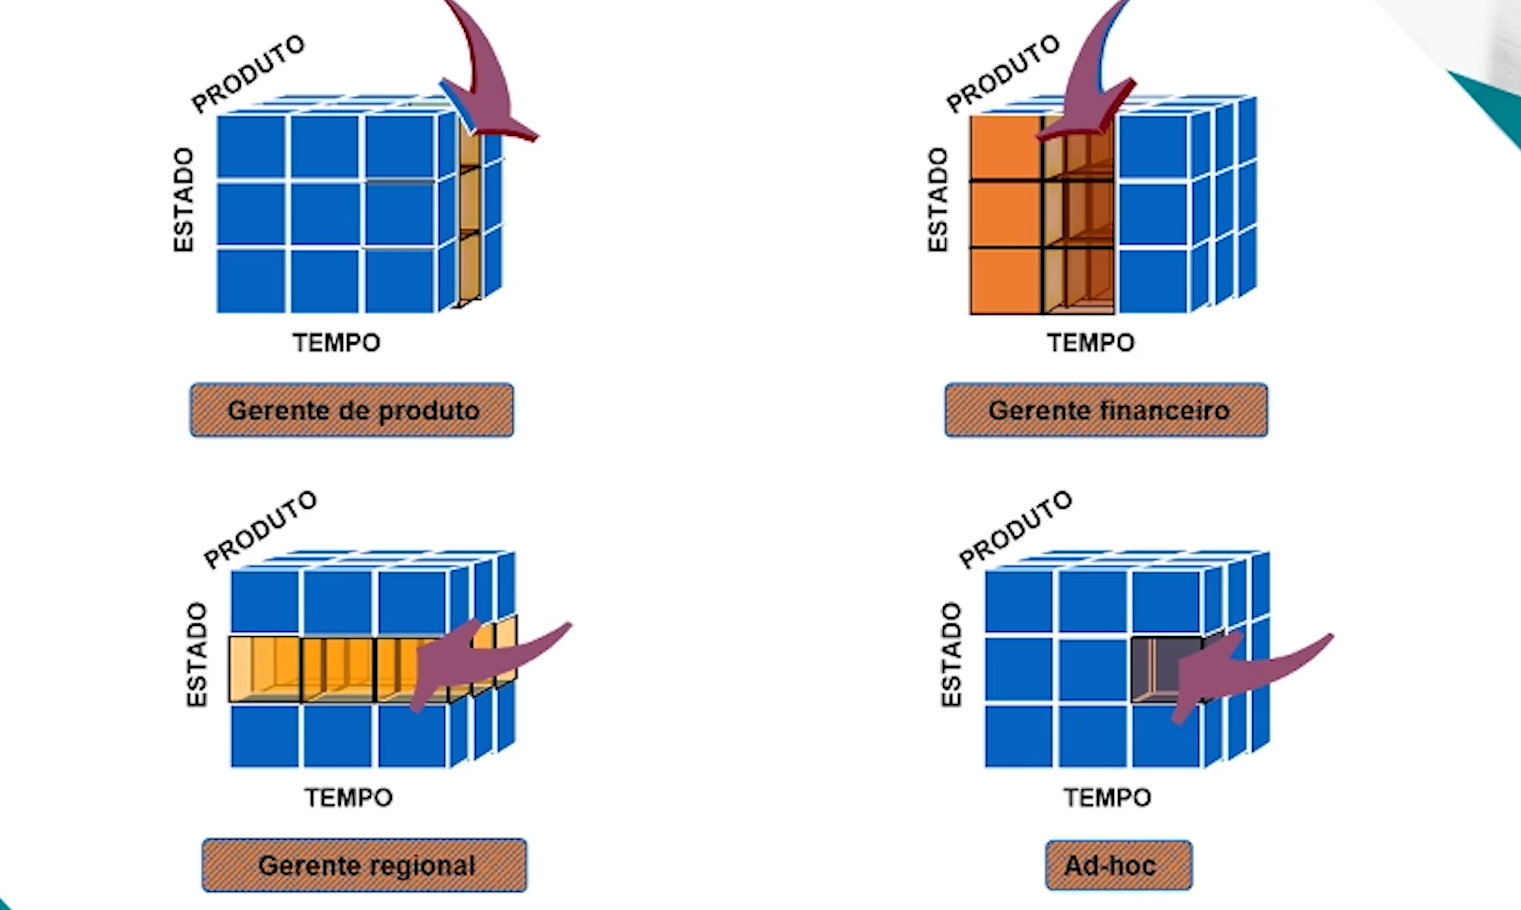

In [6]:
Image('SliceDice2.png')

## Arquiteturas

#### Podem ser classificadas em cinco formas:

* MOLAP (Multidimensional OLAP)

* ROLAP (Relacional OLAP)

* HOLAP (Hibrido OLAP)

* DOLAP (Desktop OLAP)

* WOLAP (Web OLAP)

Temos também:

* JOLAP (API Java para servidores e aplicações OLAP Orientadas a Objetos)

* SOLAP (Spatial OLAP: SIG + OLAP)

#### O local de persistência pode ser:

* MDB (Banco de dados Multidimensional)
    
    * MOLAP e HOLAP

* RDBMS (Banco de dados Relacional)
    
    * ROLAP e HOLAP

* Arquivos em base de dados locais, ou memoria RAM

    * DOLAP e WOLAP

#### MOLAP

* Os dados ficam em bases de dados multidimensionais

* Operação e montagem dos dados diretamente no servidor;

* Os dados multidimensionais utilizam espaço menor para armazenamento, em relação aos relacionais;

* Os dados são mantidos em estruturas do tipo *Array*;

* Velocidade e complexo conjunto de funções para análise;

* Suporte a grande número de usuários sem perda de desempenho;

* Possibilidade de existir "explosão" de armazenamento, ou seja, um imenso banco de dados multidimensional contendo poucos dados armazenados devido ao esparçamento dos dados (nem todo cruzamento das dimensões contém dados);

* São projetos proprietários, ou seja, não seguem o mesmo padrão para estrutura de banco, ferramentas e suportes.

#### ROLAP

* Utiliza banco relacional para simular OLAP;

* Não mantém cubos pré-calculados;

* Á medida que o usuário monta sua consulta em uma interface gráfica, a ferramenta acessa os metadados ou quaisquer outros recursos que possua para gerar o SQL;

* O front permiti efetuar consultas multidimensionais, mas o OLAP converte para consultas SQLs;

* Utiliza tecnologia estabelecida, de arquitetura aberta e padronizada;

* Benefecia-se de diversas plataformas, escalabilidade e paralelistmo de hardware;

* Baixo conjunto de funções para análise dimensional e baixo desempenho da linguagem SQL para consultas pesadas;

#### HOLAP

* Possui processamento Hibrido;

* Possui capacidade e escalabilidade das ferramentas ROLAP e desempenho superior dos bancos multidimensionais;

#### DOLAP

* Arquitetura desktop

* Possui uma base dimensional ou de subconjunto dela, ou ainda, que queiram acessar um repositorio de dados central localmente;

    * No ultimo caso, o usuário dispara instruções SQL, acessos os cubos ja existentes no banco de dados multidimensional que reside no servidor OLAP e obtem de volta micro-cubos para ser analisado.

* Redução de sobrecarga no servidor de banco de dados;

* Micro-cubo não pode ser muito grande, caso contrário, a analise pode ser muito demorada uma vez que o cliente que a processa.

#### WOLAP

* Roda em browser;

* É uma variação da estrutura cliente/servidor;

* A comunicação é abstraida por um middleware que faz a comunicação entre o cliente e o banco de dados (API);

* Segue os mesmos preceitos de aplicações web (solicitações HTTP)

### Comparação entre MOLAP e ROLAP

#### Mudanças em relação ao negócio:

* ROLAP: permite consolidações dinâmicas para análise ad-hoc facilitando a adequação a novas regras de nogócio;

* MOLAP: por criar em seu banco de dados todas as regras, há a necessidade de recriar a estrutura multidimensional e toda a base de dados para satisfazer a necessidade de mudanças;

#### Esforços de desenvolvimento

* MOLAP: é mais simples pois a ferramenta realiza as agregações sozinhas e não requer *tunning* específico do banco de dados.

* ROLAP: requer um projeto lógico específico (star ou snowflake schema), *tunning* do banco de dados relacional e a criação e manutenção das tabelas sumarizadas.

### Ferramentas do mercado para OLAP

* MOLAP: Arbor Software Essbase, Information Builders FOCUS/Fusion, Holistics Systems Holos, Hyperion Enterprise, Sinper TM/1, Comshare Commander EIS/OLAP,  Holistics Systems Holos, Kenan technologies Acutrieve, Oracle Express Objects e Express analyzer, Pilot (D&B) LigthShip Professional, Planning Sciences     Gentium.

* ROLAP: Andyne Pablo, Cognos PowerPlay, Information Advantage DecisionSuite 3.0, Informix-MetaCube, MicroStrategy DSS Agent, Prodea Beacon, BO – Business Object, DB2-OlapServer, Oracle Discoverer.

* HOLAP: White Light, Analysis Server, Crystal Holos, IBM DB2 Olap Server.

* DOLAP: Andyne GQL, Brio BrioQuery, Business Objects, Cognos Impromptu, Crystal Decision, Hummingbird.

* WOLAP: Versões novas do: BO – Business Object, MicroStrategy, Oracle Discoverer e outros.

link: https://www.devmedia.com.br/artigo-sql-magazine-9-arquiteturas-de-ferramentas-olap/7565





## Definir se é OLAP ou não...

12 Regras para definir o OLAP

1. Conceito de visão multidimensional;

2. Transparência

3. Acessibilidade

4. Performance consistente de relatório

5. Arquitetura cliente/servidor

6. Dimensionamento genérico

7. Tratamento dinâmico de matrizes esparsas

8. Suporte a vários usuários

9. Operação de cruzamento dimensional irrestritas

10. Manipulação de dados intuitiva

11. Relatórios flexíveis

12. Níveis de dimensões e agregações ilimitadas

## Dado x Informação x Conhecimento

* **Dado** é a matéria-prima da iformação. Não tem nenhum tratamento
    
    * ex: CEP de um candidato

* **Informação** é o dado tratado dentro de um contexto

    * ex: CEP dps cadidatos do Brasil que vão concorrer à vaga em um concurso público localizado na cidade de Belo Horizonte - MG.

## De onde vem os dados ?

* Os ddaos que serão lidos podem estar armazenados em um **Data warehouse** ou em um **Data Lake**, ou ainda em uma planilha, arquivo de texto, CSV dentre outros;

* O importante é ter o conector para estas origens e apresentar dados, gerando as informações que serão consumidas pelos gestores;

* O conhecimento pode vir de uma **correta história** contada pela **visualização** produzida;

## Algumas ferramentas famosas

* Business Object -> SAP

* Cognos -> IBM

* MicroStrategy

* Mondrian -> Pentaho

* OBIEE+ -> Oracle

* Power BI -> Microsoft

* Qlik Sense -> Qlik

* Tableau 

* ThougthSpot